# Shark Attack

### Problem Statement: Day of Week, Month in Non-USA attacks (by country, region, overall)

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
shark_df = pd.read_excel('GSAF5-1.xls')

shark_df.to_csv('shark_attack.csv', index = False)

<font color = 'green'><b>The dataset is in .xls format and hence the .read_excel() function is used to read the contents from the file.<br>
The excel file is then converted into a .csv file using the .to_csv() function as modifications in .csv files are flexible.<br>
index = False is used to avoid printing a new column for index.

In [4]:
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


## Data Exploration

In [10]:
print('Listing all the column values')
column_names = shark_df.columns
print(column_names)
# Here we are trying the determine all the columns present in the dataset.

Listing all the column values
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [11]:
print('Datatype of Each Column')
print(shark_df.dtypes)

Datatype of Each Column
Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object


In [12]:
print('Checking for Unique Values')
for i in column_names:
  print('{} is unique: {}'.format(i, shark_df[i].is_unique))

Checking for Unique Values
Case Number is unique: False
Date is unique: False
Year is unique: False
Type is unique: False
Country is unique: False
Area is unique: False
Location is unique: False
Activity is unique: False
Name is unique: False
Sex  is unique: False
Age is unique: False
Injury is unique: False
Fatal (Y/N) is unique: False
Time is unique: False
Species  is unique: False
Investigator or Source is unique: False
pdf is unique: False
href formula is unique: False
href is unique: False
Case Number.1 is unique: False
Case Number.2 is unique: False
original order is unique: False
Unnamed: 22 is unique: False
Unnamed: 23 is unique: False


In [13]:
print('Index Values')
print(shark_df.index.values)

Index Values
[    0     1     2 ... 25757 25758 25759]


In [14]:
print('Summary Statistics')
print(shark_df.describe())

Summary Statistics
              Year  original order
count  6449.000000     6451.000000
mean   1929.601023     3226.999845
std     277.133872     1862.388329
min       0.000000        2.000000
25%    1942.000000     1614.500000
50%    1980.000000     3227.000000
75%    2006.000000     4839.500000
max    2019.000000     6452.000000


<font color = 'green'><b> The Data Exploration gives us preliminary insight on the data that we are dealing with.<br>
    Initial exploration of data such as datatypes, index values, and the summary statistics provides various paths to data cleaning and visualization<br>

# Data Cleaning

#### Cleaning Year column

In [37]:
to_drop = {'Case Number','Location','Activity','Name','Sex ','Age','Injury','Fatal (Y/N)','Time','Species ','Investigator or Source','pdf','href formula','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23'}

shark_df.drop(columns = to_drop, inplace = True)
# Here we dropping all the columns which are not relevant to our problem statement.
#to-drop is a set of all the columns which need to be dropped.
# we pass the to_drop as an argument in the drop() function and inplace = True will make the changes permanent.

<font color = 'green'><b> With respect to the problem statement, i have dropped columns to make a simple path to data exploration and visualization.

In [38]:
shark_df.head()
# to show that the irrelevant tables have been dropped and the shows that the dataset is getting cleaned.

,Date,Year,Type,Country,Area
0,27-Aug-2019,2019.0,Provoked,USA,Florida
1,21-Aug-2019,2019.0,Unprovoked,USA,Florida
2,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii
3,16-Aug-2019,2019.0,Unprovoked,USA,Florida
4,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii


In [39]:
# Code to remove all the nan values

shark_df.dropna(how = 'all', inplace = True)
print(shark_df.head())
shark_df.tail()
# the rows which had nan values in all the columns were removed as they were irrelevant.
# how = 'all' was used to delete the rows which had all nan values.
# the tail() function was used to show that all of those values were removed

          Date    Year        Type Country     Area
0  27-Aug-2019  2019.0    Provoked     USA  Florida
1  21-Aug-2019  2019.0  Unprovoked     USA  Florida
2  20-Aug-2019  2019.0  Unprovoked     USA   Hawaii
3  16-Aug-2019  2019.0  Unprovoked     USA  Florida
4  11-Aug-2019  2019.0  Unprovoked     USA   Hawaii


,Date,Year,Type,Country,Area
6446,1900-1905,0.0,Unprovoked,USA,North Carolina
6447,1883-1889,0.0,Unprovoked,PANAMA,NaN
6448,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province
6449,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland
6450,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland


In [40]:
#Code to clean Year column.
# we will be using year data for the last 20 years and only in the format 'YYYY'

year = shark_df['Year'].astype(str).str.extract(r'^(\d{4})', expand=False)
# this code will extract all the data in the format YYYY.
shark_df['Year'] = pd.to_numeric(year)
#this line will convert the column into a numeric column.


<font color = 'green'><b> Data from past 20 years will be taken into consideration and the year format 'yyyy' will be extracted from the year column using a simple regular expression and convert that to a numeric value.

In [41]:
last_20 = shark_df[shark_df['Year'] < 1999].index
# this code will collect all the years less than 1999.
shark_df.drop(last_20,inplace = True)
# once all the years less than 1999 are collected, they are deleted from the dataset.

In [42]:
shark_df.dropna(subset = ['Year'], how = 'any', inplace = True)
# here we are dropping all the rows in the Year column with NaN values
shark_df['Year'].tail()
# checking if all the values below 1999 and NaN are deleted.

2280    1999.0
2281    1999.0
2282    1999.0
2283    1999.0
2284    1999.0
Name: Year, dtype: float64

#### Cleaning Type column

In [43]:
# Code to clean the Type Column
print(shark_df.Type.unique())

['Provoked' 'Unprovoked' 'Unconfirmed' 'Unverified' 'Questionable'
 'Watercraft' 'Invalid' 'Under investigation' 'Sea Disaster' nan]


In [44]:
# the type column contains 10 unique values out of which only 2 of them are relevant to our case.
# we need to extract just the rows having 'Provoked' and 'Unprovoked' values in the Type column.

type_attack = shark_df[(shark_df['Type'] != 'Provoked') & (shark_df['Type'] != 'Unprovoked')].index
shark_df.drop(type_attack, inplace = True)
# the above code removes all the rows which do not have the values Provoked and Unprovoked.

print(shark_df.Type.unique())
# this shows the only unique values present in the Type column is Provoked and Unprovoked.

['Provoked' 'Unprovoked']


<font color = 'green'><b> The Type column describes the nature of shark attack<br>
    Here, on two types of attack are relevant to the analysis, namely - Provoked, Unprovoked<br>
    Rest of the attacks are fictional.

#### Cleaning Country column

In [45]:
# Code to clean Country column

non_usa = shark_df[shark_df['Country'] == 'USA'].index
# here we have used conditional selection to find all the rows with Country values 'USA' and save the indexes to a variable.
shark_df.drop(non_usa, inplace = True)
# we pass the variable non_usa as an argument to the drop() function to remove all those rows with Country value 'USA'

In [46]:
shark_df.dropna(subset = ['Country'], how = 'any', inplace = True)
#dropping the missing values

<font color = 'green'><b> Here, we are considering countries other than USA.

#### Cleaning Data Column

In [47]:
shark_df['Date'] = shark_df['Date'].map(lambda x: x.lstrip('Reported '))
# this code will remove the 'Reported ' string from the rows in the Date column

In [48]:
shark_df['Date'] = shark_df['Date'].str.extract(pat = '^(\d{2}-{1}\w[a-zA-z]\w-\d\d\d\d)')
# this code will extract all the dates which are in the format DD-MMM-YYYY

<font color = 'green'><b> Using regular expressions, we extract data in the format 'dd-mm-yyyy'.

In [49]:
shark_df.tail(20)

,Date,Year,Type,Country,Area
2231,NaN,1999.0,Unprovoked,MARSHALL ISLANDS,Alinglaplap Atoll
2232,NaN,1999.0,Unprovoked,MARSHALL ISLANDS,Alinglaplap Atoll
2247,23-Aug-1999,1999.0,Unprovoked,MARSHALL ISLANDS,Ralik Chain
2251,05-Aug-1999,1999.0,Unprovoked,BAHAMAS,Abaco Islands
2252,29-Jul-1999,1999.0,Unprovoked,SOUTH AFRICA,Western Cape Province
2255,15-Jul-1999,1999.0,Unprovoked,SOUTH AFRICA,Western Cape Province
2258,03-Jul-1999,1999.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province
2263,29-May-1999,1999.0,Unprovoked,AUSTRALIA,South Australia
2264,01-May-1999,1999.0,Unprovoked,BRAZIL,Pernambuco
2265,22-Apr-1999,1999.0,Unprovoked,MAURITIUS,Grand Baie


In [50]:
shark_df.dropna(subset = ['Date'], how = 'any', inplace = True)
#this will drop all the rows in the Date column with missing values.

In [51]:
import datetime 
import calendar
shark_df['Date'] = pd.to_datetime(shark_df['Date'])
#this code converts the previous date format into YYYY-MM-DD
shark_df['Day of Week'] = shark_df['Date'].dt.day_name()
#this code will create a new 'Day of Week' column using the Date column to show the day of the week.
#eg: 2019-07-28 will return Sunday in the new column.

shark_df['Month'] = shark_df['Date'].dt.month
#this code will extract the month from the 'Date' column and return a integer value from 1 - 7
# 1- Monday, 2- Tuesday, 3-Wednesday, 4-Thursday, 5-Friday, 6-Saturday and 7-Sunday
shark_df['Month'] = shark_df['Month'].apply(lambda x: calendar.month_abbr[x])
# this code takes those integer values and return a month in string format.

<font color = 'green'><b> Creating two new columns, Day of Week and Month from the Date column using datetime package.

In [52]:
shark_df.head(10)

,Date,Year,Type,Country,Area,Day of Week,Month
11,2019-07-28,2019.0,Unprovoked,AUSTRALIA,Queensland,Sunday,Jul
16,2019-07-17,2019.0,Unprovoked,NEW ZEALAND,Chatham Islands,Wednesday,Jul
19,2019-07-10,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Wednesday,Jul
20,2019-07-09,2019.0,Unprovoked,AUSTRALIA,Queensland,Tuesday,Jul
21,2019-07-06,2019.0,Provoked,MEXICO,Quinta Roo,Saturday,Jul
22,2019-07-04,2019.0,Unprovoked,BAHAMAS,Abaco Islands,Thursday,Jul
24,2019-06-26,2019.0,Unprovoked,BAHAMAS,Lucayan Archipelago,Wednesday,Jun
25,2019-06-21,2019.0,Unprovoked,BAHAMAS,Abaco Islands,Friday,Jun
26,2019-06-17,2019.0,Unprovoked,BAHAMAS,NaN,Monday,Jun
30,2019-06-06,2019.0,Unprovoked,AUSTRALIA,Tasmania,Thursday,Jun


In [53]:
shark_df.dropna(subset = ['Area'], how = 'any', inplace = True)

In [54]:
shark_df['Country'] = shark_df['Country'].str.upper()
shark_df['Country'] = shark_df['Country'].astype(str).str.replace("COLUMBIA",'COLOMBIA')
shark_df['Country'] = shark_df['Country'].astype(str).str.replace("ST HELENA, BRITISH OVERSEAS TERRITORY","ST HELENA")
shark_df['Country'] = shark_df['Country'].astype(str).str.replace("UNITED ARAB EMIRATES (UAE)","UNITED ARAB EMIRATES")
shark_df['Country'] = shark_df['Country'].astype(str).str.replace("ST. MAARTIN","ST. MAARTEN")
shark_df['Country'] = shark_df['Country'].astype(str).str.replace("MEXICO ","MEXICO")
# cleaning mispelled values.

<font color = 'green'><b> For the purpose of data visualization, we bin the countries into continents.<br>
    we have created list of different continents containing all the countries under it.<br>
    We then create a new column Continent and map the countries to it.

In [55]:
#we have created a list of continents with all its countries. 

asia = ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China','Cyprus',
        'East Timor','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','Kuwait',
        'Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman',
        'Okinawa','Pakistan','Philippines','Qatar','Saudi Arabia','Singapore','South Korea','Sri Lanka','State of Palestine',
        'Syria','Taiwan','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan',
        'Vietnam','Yemen']

europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria',
          'Croatia','Cyprus','Czech Republic','Denmark','Estonia','England','Finland','France','Georgia','Germany',
          'Greece','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia',
          'Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Reunion','Romania','Russia',
          'San Marino','Serbia','Slovakia','Slovenia','Scotland','Spain','Sweden','Switzerland','Ukraine',
          'United Kingdom','Vatican City']

africa = ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad',
          'Comoros','Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
          'Guinea-Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania',
          'Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal',
          'St Helena','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania',
          'Togo','Tunisia','Uganda','Zambia','Zimbabwe']

australia = ['Australia']

oceania = ['Fiji','Kiribati','Guam',' Tonga','French Polynesia','New Caledonia' ,'Marshall Islands','Micronesia',
           'Nauru' ,'New Zealand' , 'Palau', 'Papua New Guinea' , 'Samoa', 'Solomon Islands', 'Tonga',
           'Tuvalu', 'Vanuatu']

america = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay',
           'Venezuela','Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica',
           'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua',
           'Panama','Saint Kitts and Nevis','Saint Lucia','St. Maarten','Grand Cayman','Saint Vincent and the Grenadines',
           'Trinidad & Tobago','Turks & Caicos','USA']

In [56]:
Asia = [x.upper() for x in asia]
Europe = [x.upper() for x in europe]
Africa = [x.upper() for x in africa]
Australia= [x.upper() for x in australia]
America = [x.upper() for x in america]
Oceania = [x.upper() for x in oceania]
# converting all the values in the list to upper case.

In [57]:
def get_continent(country):
    if country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in Africa:
        return "Africa"
    elif country in Australia:
        return "Australia"
    elif country in America:
        return "America"
    elif country in Oceania:
        return "Oceania"
# this function will check the country name and check the continent list and return the name of the continent.

In [58]:
shark_df['Continent'] = shark_df['Country'].apply(lambda x: get_continent(x))
# this line of code will create a new column 'Continent' from the 'Country' column using the apply function.
# we pass our custom function - get_continent() as a parameter to the apply function.

In [59]:
shark_df.dropna(subset = ['Continent'], how = 'any', inplace = True)

In [60]:
shark_df.reset_index()
# resetting the index value of the dataset.

,index,Date,Year,Type,Country,Area,Day of Week,Month,Continent
0,11,2019-07-28,2019.0,Unprovoked,AUSTRALIA,Queensland,Sunday,Jul,Australia
1,16,2019-07-17,2019.0,Unprovoked,NEW ZEALAND,Chatham Islands,Wednesday,Jul,Oceania
2,19,2019-07-10,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Wednesday,Jul,Africa
3,20,2019-07-09,2019.0,Unprovoked,AUSTRALIA,Queensland,Tuesday,Jul,Australia
4,21,2019-07-06,2019.0,Provoked,MEXICO,Quinta Roo,Saturday,Jul,America
5,22,2019-07-04,2019.0,Unprovoked,BAHAMAS,Abaco Islands,Thursday,Jul,America
6,24,2019-06-26,2019.0,Unprovoked,BAHAMAS,Lucayan Archipelago,Wednesday,Jun,America
7,25,2019-06-21,2019.0,Unprovoked,BAHAMAS,Abaco Islands,Friday,Jun,America
8,30,2019-06-06,2019.0,Unprovoked,AUSTRALIA,Tasmania,Thursday,Jun,Australia
9,33,2019-05-29,2019.0,Unprovoked,NEW CALEDONIA,Bélep Islands,Wednesday,May,Oceania


# Data Visualization

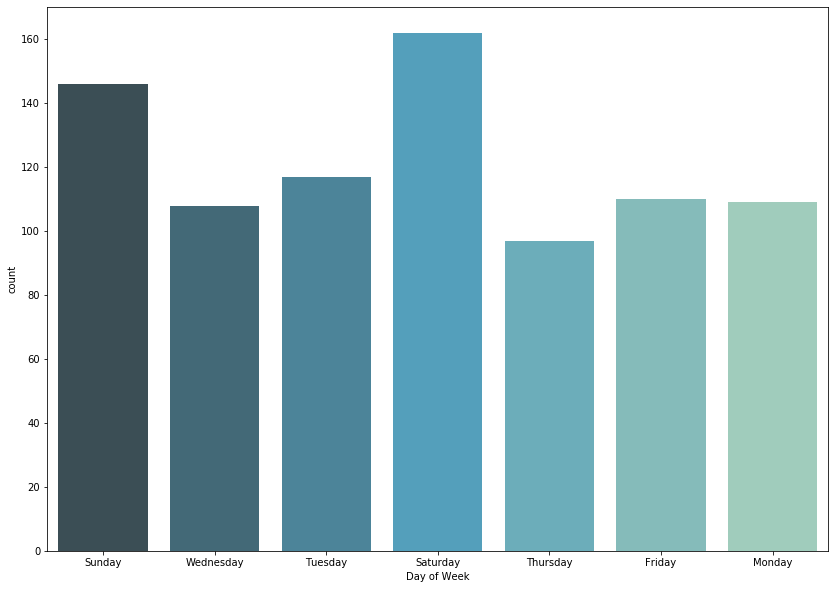

In [61]:
# Day of Week vs Number of Attacks
import seaborn as sns
plt.figure(figsize = (14,10))
sns.countplot(x='Day of Week',data=shark_df, palette="GnBu_d")

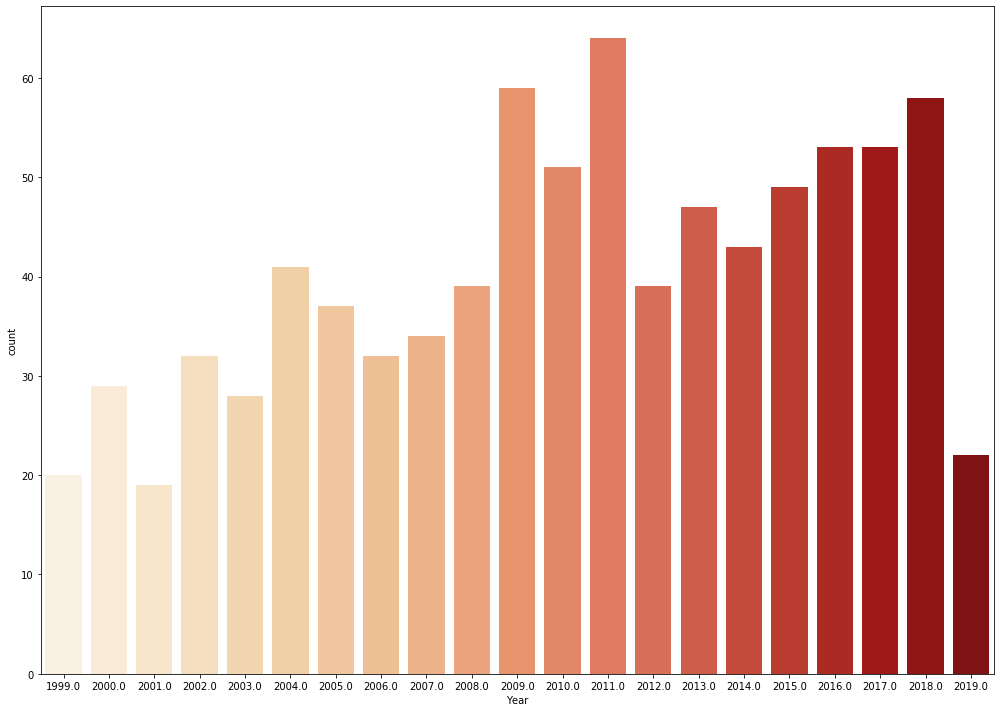

In [62]:
# Year vs Number of Attacks
plt.figure(figsize = (14,10))
sns.countplot(x='Year',data=shark_df, palette="OrRd")
plt.tight_layout()

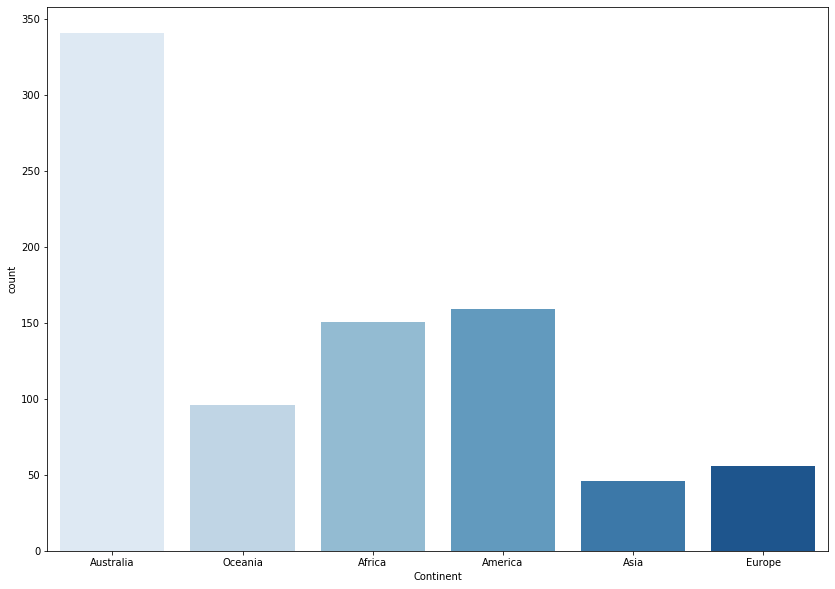

In [63]:
# Continent vs Number of Attacks
plt.figure(figsize = (14,10))
sns.countplot(x='Continent',data=shark_df, palette="Blues")

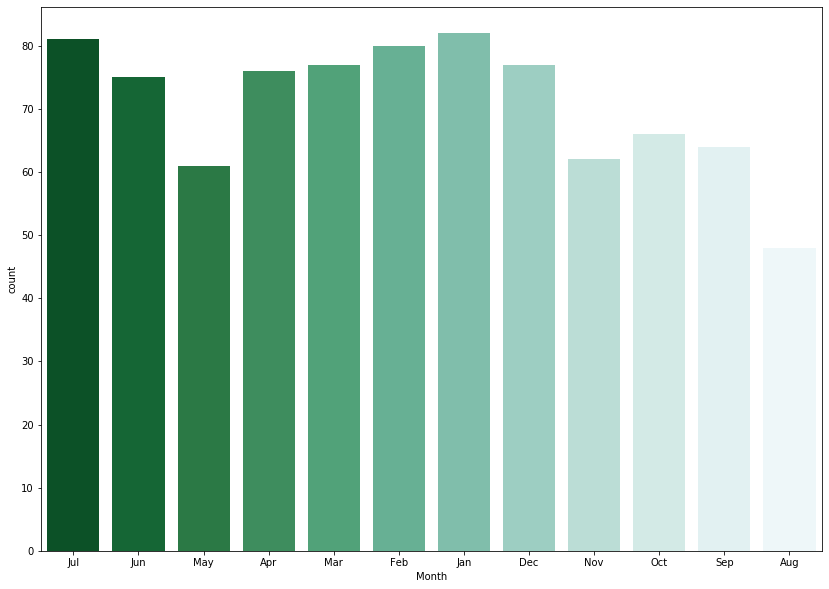

In [64]:
# Month vs Number of Attacks
plt.figure(figsize = (14,10))
sns.countplot(x='Month',data=shark_df, palette="BuGn_r")

<font color = 'green'><b> From the above visualizations, we have a storyline which perfectly matches the facts.<br>
    First, Saturday has the highest number of attacks as it is a weekend<br>
    Second, Australia has the highest number of attacks in the month of January,as january is the summer season in Australia and there is a huge population at that time of the year present in beaches.